In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as spc

In [9]:
#formatting plots a little nicer
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [10]:
def brush_input_alternate_kW(H,x,z):
    return (1-alpha) * sigma * Tfire**4 * z * 2 * x * spc.ellipk(-(H-z)**2 / x**2) / (x**2+(H-z)**2)

In [11]:
xmax = 0.2
dx = 0.01
x = np.arange(0, xmax+dx, dx)
xmid = np.arange(dx/2, xmax+(dx/2), dx)

tmax = 2000
dt = 1
t = np.arange(0,tmax+dt,dt)

In [12]:
alpha = 0.3
k = 2
rho = 2650
kappa = 1e-6
c = k/(rho*kappa)
sigma = 5.67e-8

In [13]:
len(t)

2001

In [14]:
%%time

Q = np.zeros(np.size(x))
T0 = 10 + 273.15

Tfire=1100+273.15
Tcrit = 500
R=8.314
Ea=35000
spall_length = 0.01

dz = 0.05
d0=0
z0 = 0
zmax = 5
z_vals = np.arange(z0,zmax+dz,dz)
zfire = 0.225

T = T0*np.ones((len(t),len(xmid),len(z_vals)))
Tmin=283.15

nfires = 3000
d = d0*np.ones((nfires+1,len(z_vals)))
damage = np.zeros((nfires+1,len(t),len(xmid),len(z_vals)))

brush_distance = np.flip(np.arange(0.1,100.1+0.1,0.1))
brush_distance = np.append(brush_distance, 10000*np.ones(len(t)))

for n in range(nfires):
    T = T0*np.ones((len(t)+1,len(xmid),len(z_vals)))
    Q = np.zeros(np.size(x))
    for z in range(len(z_vals)): # array this loop    
        for i in range(len(t)-1):
            Qin = brush_input_alternate_kW(z_vals[z],brush_distance[i]+d[n,z],zfire)
            Qout = sigma * T[i,0,z]**4
            Qbase = 0
            Q0 = Qin - Qout
            Q[0] = Q0
            Q[-1] = Qbase
            Q[1:-1] = -k*np.diff(T[i,:,z])/dx
            dTdt = -(1/(rho*c))*np.diff(Q)/dx
            
            T[i+1,:,z] = T[i,:,z] + dTdt*dt

            damage_add = (np.exp(-Ea/(R*T[i,:,z]))-np.exp(-Ea/(R*Tmin)))*dt
            damage_add[damage_add<0]=0
            damage[n,i+1,:,z] = damage[n,i,:,z] + damage_add

        if damage[n,-1,0,z]>=1:
            d[n+1,z]=d[n,z]+spall_length
            damage[n+1,0,:-2,z]=damage[n,-1,2:,z]

        else:
            d[n+1,z]=d[n,z]
            damage[n+1,0,:,z]=damage[n,-1,:,z]

CPU times: total: 4h 25min 22s
Wall time: 4h 28min 59s


In [157]:
np.max(damage[:,-1,0,4])

np.float64(0.16089531786013675)

In [18]:
np.max(d)

0.4000000000000002

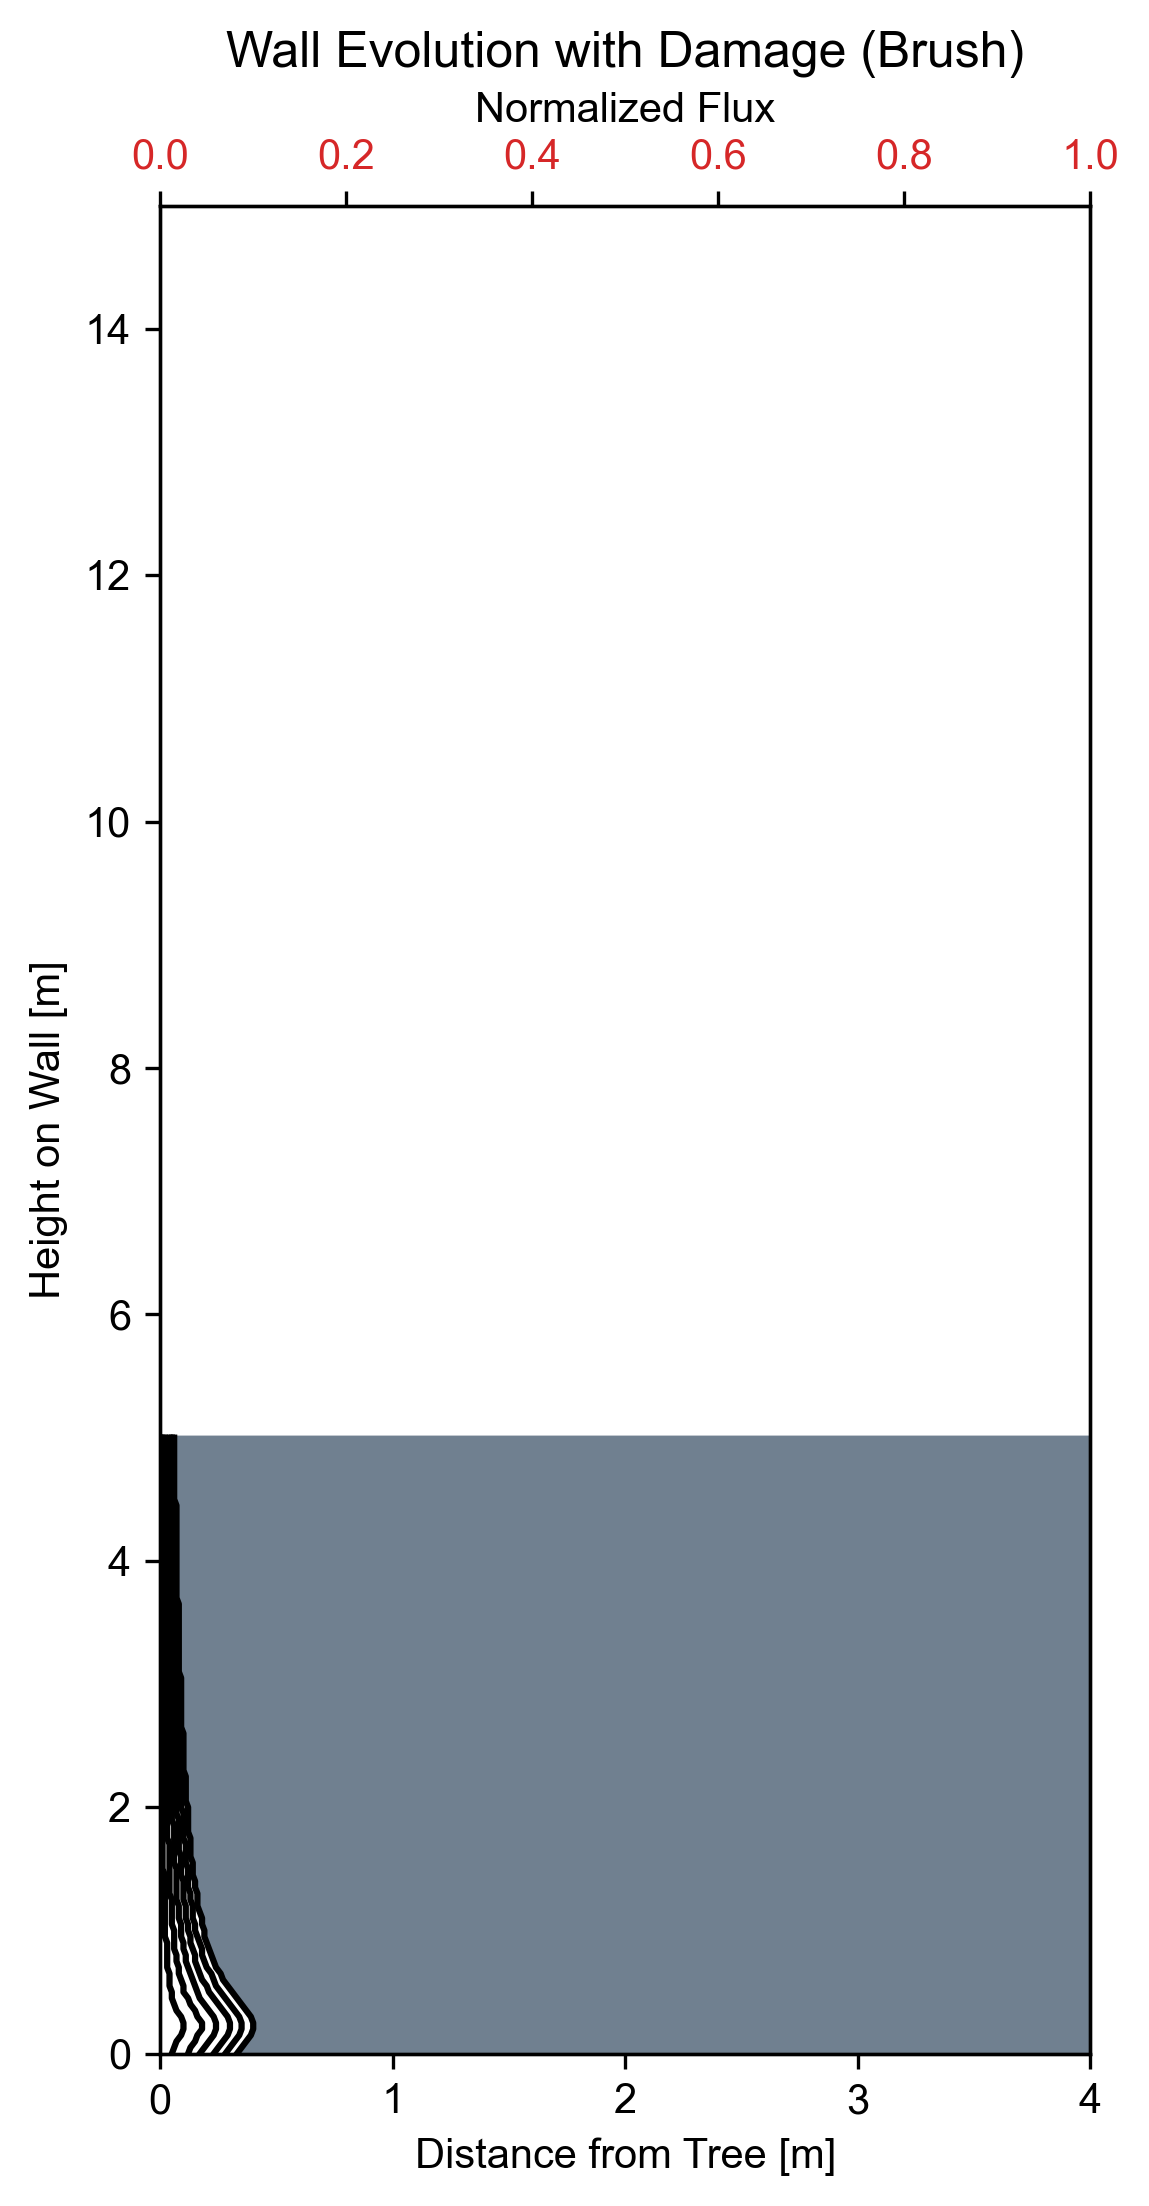

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,8), dpi=300)
#Q = np.array([Q_in(z_vals[z],50,d[n,z]) for z in range(len(z_vals))])
#Q0 = np.array([Q_in(z_vals[z],50,d[0,z]) for z in range(len(z_vals))])
ax1.plot(d[-1,:], z_vals, c='k')
ax1.fill_betweenx(z_vals,d[-1,:], 7, color='slategrey')
#ax1.text(4.2,8, 'n={}'.format(n), fontsize=12)
ax1.set_title('Wall Evolution with Damage (Brush)')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_xlabel('Depth in Wall [m]')
ax1.set_xlim(0,4)
ax1.set_ylim(0,15)

ax2 = ax1.twiny()
color = 'tab:red'
#ax2.plot((Q/Qmax),z_vals, c='red')
#ax2.plot(Q0/Qmax,z_vals, c='red', ls='--')
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(0,1)
ax2.set_xlabel('Normalized Flux')

if n>500:
    ax1.plot(d[500,:], z_vals, c='k')
if n>1000:
    ax1.plot(d[1000,:], z_vals, c='k')
if n>1500:
    ax1.plot(d[1500,:], z_vals, c='k')
if n>2000:
    ax1.plot(d[2000,:], z_vals, c='k')
if n>2500:
    ax1.plot(d[2500,:], z_vals, c='k')
if n>3000:
    ax1.plot(d[3000,:], z_vals, c='k')
if n>3500:
    ax1.plot(d[3500,:], z_vals, c='k')
if n>4000:
    ax1.plot(d[4000,:], z_vals, c='k')
if n>4500:
    ax1.plot(d[4500,:], z_vals, c='k')
#Q = np.array([Q_in(z_vals[z],50,d[n,z]) for z in range(len(z_vals))])
#ax1.plot((Q/np.max(Q))*3 + 4,z_vals, c='r')

In [97]:
damage[-1,-1,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(50, 101))

In [63]:
brush_distance[201]

np.float64(80.0)

In [15]:
np.savetxt('brush_final_placements.txt', d)

In [16]:
brush_place = np.loadtxt('brush_final_placements.txt')
brush_place[-1]

array([0.33, 0.35, 0.37, 0.39, 0.4 , 0.4 , 0.39, 0.37, 0.35, 0.33, 0.31,
       0.29, 0.27, 0.26, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.19, 0.18,
       0.18, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.14, 0.14, 0.14, 0.13,
       0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06])

In [20]:
n

2999